In [1]:
import hepytorch as hep

myHEP = hep.HEPTorch('./recipes/simple_mass_estimator.json')

In [2]:
result = myHEP.train()

Epoch 0, loss: 62.16723666595541
Epoch 1, loss: 0.9828210526470614
Epoch 2, loss: 0.9303318268444821
Epoch 3, loss: 0.919477501772856
Epoch 4, loss: 0.9229373917799751
Epoch 5, loss: 0.9170186661361195
Epoch 6, loss: 0.8921720104254904
Epoch 7, loss: 0.9025724894204037
Epoch 8, loss: 0.8728989179980623
Epoch 9, loss: 0.9061747905869814
Epoch 10, loss: 0.8967411879871855
Epoch 11, loss: 0.8924560802758535
Epoch 12, loss: 0.8834883798407659
Epoch 13, loss: 0.8902060950762164
Epoch 14, loss: 0.8822047637744178
Epoch 15, loss: 0.8917938511376688
Epoch 16, loss: 0.8729530721908615
Epoch 17, loss: 0.8878430101542494
Epoch 18, loss: 0.8857487111343552
Epoch 19, loss: 0.8844661932758004


In [3]:
import matplotlib.pyplot as plt
top_mass = myHEP.model(myHEP.data).detach().numpy()
true_mass = myHEP.target.detach().numpy()
print(top_mass)

[[174.29126]
 [174.4383 ]
 [171.81863]
 ...
 [172.8322 ]
 [171.98056]
 [172.34976]]


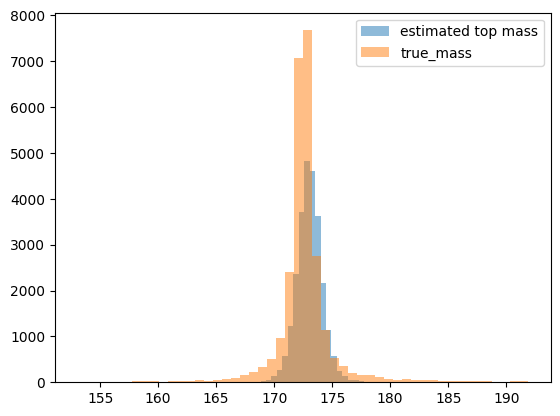

In [4]:
# draw two histograms of top_mass and true_mass
plt.hist(top_mass, bins=50, alpha=0.5, label='estimated top mass')
plt.hist(true_mass, bins=50, alpha=0.5, label='true_mass')
plt.legend(loc='upper right')
plt.show()

In [5]:
import shap

# Use X for background and data, convert to numpy for SHAP
background = myHEP.data[:100].numpy()
data_to_explain = myHEP.data[100:200].numpy()

def model_wrapper(x):
	import torch
	return myHEP.model(torch.tensor(x, dtype=torch.float)).detach().numpy()

explainer = shap.Explainer(model_wrapper, background)
feature_names = [ "j_1e", "j_2e", "l_1e", "l_2e", "ex", "ey", "mex", "mey" ]
explainer.feature_names = feature_names
shap_values = explainer(data_to_explain)

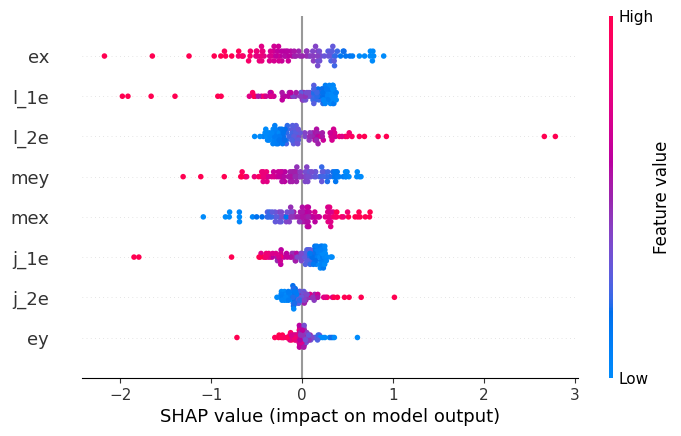

In [6]:
shap.plots.beeswarm(shap_values)


In [7]:
clustering = shap.utils.hclust(myHEP.data[100:10000].numpy(), myHEP.target[100:10000].numpy())

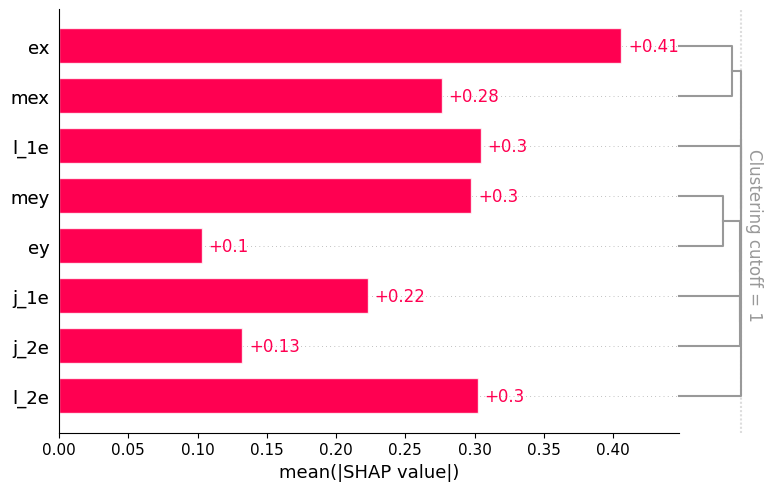

In [8]:
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=1.0)


In [9]:
# Find the index for "l_2e"
shap_values[:2]

.values =
array([[-0.01017247, -0.03037935,  0.09986199, -0.06395958, -0.10899841,
         0.0054399 , -0.20088664, -0.23714981],
       [ 0.1639023 , -0.07972671,  0.03813347, -0.09070566, -1.64838394,
         0.20206938,  0.62602511, -0.36929842]])

.base_values =
array([[173.04732773],
       [173.04732773]])

.data =
array([[ 0.09593942, -0.05327044,  0.10286128, -0.17919773,  0.2454285 ,
        -0.40220633, -0.36194506,  0.46199614],
       [-0.71629435, -0.39145926,  0.19130681, -0.21845247,  2.7162359 ,
        -2.3405266 ,  1.4986947 ,  0.5974247 ]], dtype=float32)

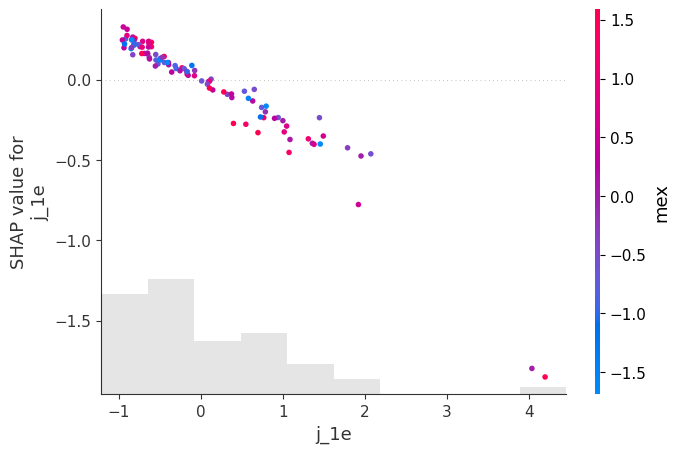

In [10]:
shap.plots.scatter(shap_values[:,0], color=shap_values)

In [11]:
from captum.attr import LayerConductance, LayerActivation, LayerIntegratedGradients
from captum.attr import IntegratedGradients, DeepLift, GradientShap, NoiseTunnel, FeatureAblation

In [12]:
ig = IntegratedGradients(myHEP.model)
ig_nt = NoiseTunnel(ig)
dl = DeepLift(myHEP.model)
gs = GradientShap(myHEP.model)
fa = FeatureAblation(myHEP.model)

In [13]:
ig_attr_test = ig.attribute(myHEP.data[:100], n_steps=50)

In [14]:
ig_attr_test = ig.attribute(myHEP.data[:100], n_steps=50)
ig_nt_attr_test = ig_nt.attribute(myHEP.data[:100])
dl_attr_test = dl.attribute(myHEP.data[:100])
gs_attr_test = gs.attribute(myHEP.data[:100], baselines=(myHEP.data[100:200],))
fa_attr_test = fa.attribute(myHEP.data[:100])

/Users/I550012/venv/hepytorch/lib/python3.12/site-packages/captum/attr/_core/deep_lift.py:294: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  gradient_mask = apply_gradient_requirements(inputs_tuple)
/Users/I550012/venv/hepytorch/lib/python3.12/site-packages/captum/log/dummy_log.py:39: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  return func(*args, **kwargs)


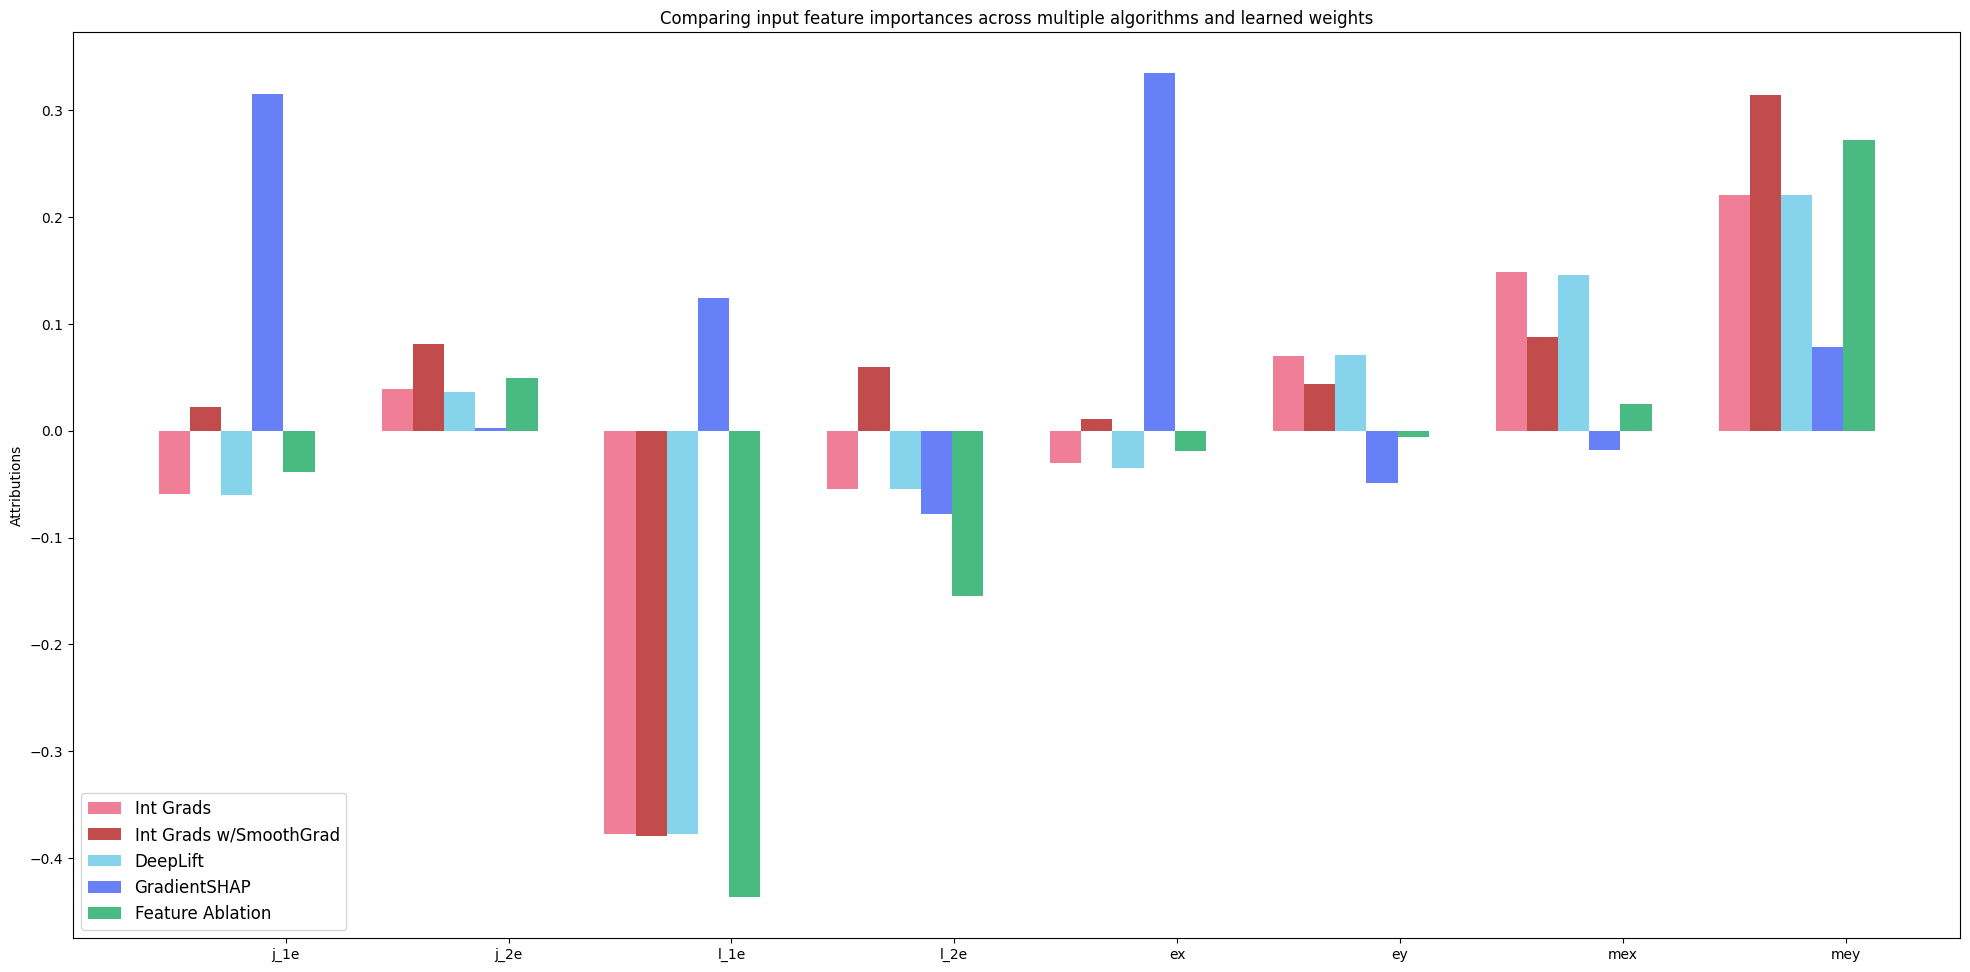

In [15]:
# prepare attributions for visualization
import numpy as np
x_axis_data = np.arange(myHEP.data[:100].shape[1])
x_axis_data_labels = list(map(lambda idx: feature_names[idx], x_axis_data))

ig_attr_test_sum = ig_attr_test.detach().numpy().sum(0)
ig_attr_test_norm_sum = ig_attr_test_sum / np.linalg.norm(ig_attr_test_sum, ord=1)

ig_nt_attr_test_sum = ig_nt_attr_test.detach().numpy().sum(0)
ig_nt_attr_test_norm_sum = ig_nt_attr_test_sum / np.linalg.norm(ig_nt_attr_test_sum, ord=1)

dl_attr_test_sum = dl_attr_test.detach().numpy().sum(0)
dl_attr_test_norm_sum = dl_attr_test_sum / np.linalg.norm(dl_attr_test_sum, ord=1)

gs_attr_test_sum = gs_attr_test.detach().numpy().sum(0)
gs_attr_test_norm_sum = gs_attr_test_sum / np.linalg.norm(gs_attr_test_sum, ord=1)

fa_attr_test_sum = fa_attr_test.detach().numpy().sum(0)
fa_attr_test_norm_sum = fa_attr_test_sum / np.linalg.norm(fa_attr_test_sum, ord=1)

width = 0.14
legends = ['Int Grads', 'Int Grads w/SmoothGrad','DeepLift', 'GradientSHAP', 'Feature Ablation']

plt.figure(figsize=(20, 10))

ax = plt.subplot()
ax.set_title('Comparing input feature importances across multiple algorithms and learned weights')
ax.set_ylabel('Attributions')

FONT_SIZE = 16
plt.rc('font', size=FONT_SIZE)            # fontsize of the text sizes
plt.rc('axes', titlesize=FONT_SIZE)       # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)       # fontsize of the x and y labels
plt.rc('legend', fontsize=FONT_SIZE - 4)  # fontsize of the legend

ax.bar(x_axis_data, ig_attr_test_norm_sum, width, align='center', alpha=0.8, color='#eb5e7c')
ax.bar(x_axis_data + width, ig_nt_attr_test_norm_sum, width, align='center', alpha=0.7, color='#A90000')
ax.bar(x_axis_data + 2 * width, dl_attr_test_norm_sum, width, align='center', alpha=0.6, color='#34b8e0')
ax.bar(x_axis_data + 3 * width, gs_attr_test_norm_sum, width, align='center',  alpha=0.8, color='#4260f5')
ax.bar(x_axis_data + 4 * width, fa_attr_test_norm_sum, width, align='center', alpha=1.0, color='#49ba81')
ax.autoscale_view()
plt.tight_layout()

ax.set_xticks(x_axis_data + 0.5)
ax.set_xticklabels(x_axis_data_labels)

plt.legend(legends, loc=3)
plt.show()

In [16]:
myHEP.model.train()

SimpleNeuralNetwork(
  (network): Sequential(
    (0): Linear(in_features=8, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=100, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.0, inplace=False)
    (7): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [17]:
layer4=myHEP.model.network[4] 
lc = LayerConductance(myHEP.model, layer4)
lc_attr_test = lc.attribute(myHEP.data[:100], n_steps=10, attribute_to_layer_input=True)
lin4_weights = layer4.weight



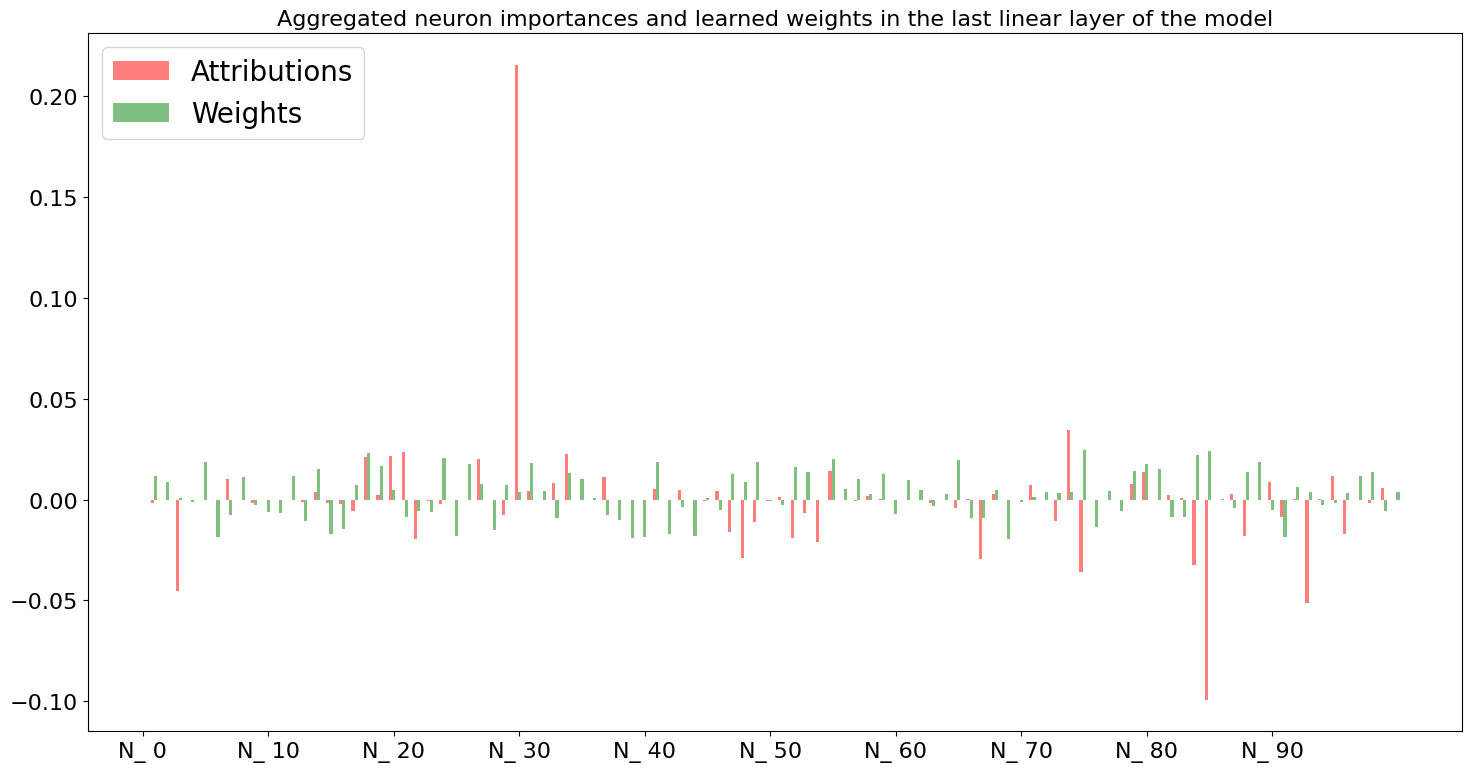

In [19]:
plt.figure(figsize=(15, 8))

x_axis_data = np.arange(lc_attr_test.shape[1])


y_axis_lc_attr_test = lc_attr_test.mean(0).detach().numpy()
y_axis_lc_attr_test = y_axis_lc_attr_test / np.linalg.norm(y_axis_lc_attr_test, ord=1)

y_axis_lin4_weight = lin4_weights[0].detach().numpy()
y_axis_lin4_weight = y_axis_lin4_weight / np.linalg.norm(y_axis_lin4_weight, ord=1)

width = 0.25
legends = ['Attributions','Weights']
x_axis_labels = [ 'N_ {}'.format(i) for i in range(len(y_axis_lin4_weight))]

ax = plt.subplot()
ax.set_title('Aggregated neuron importances and learned weights in the last linear layer of the model')

ax.bar(x_axis_data + width, y_axis_lc_attr_test, width, align='center', alpha=0.5, color='red')
ax.bar(x_axis_data + 2 * width, y_axis_lin4_weight, width, align='center', alpha=0.5, color='green')
plt.legend(legends, loc=2, prop={'size': 20})
ax.autoscale_view()
plt.tight_layout()

tick_indices = np.arange(0, len(x_axis_labels), 10)
ax.set_xticks(x_axis_data[tick_indices] - 0.5)
ax.set_xticklabels([x_axis_labels[i] for i in tick_indices])

plt.show()

Pearson r = -0.092, p = 3.650e-01


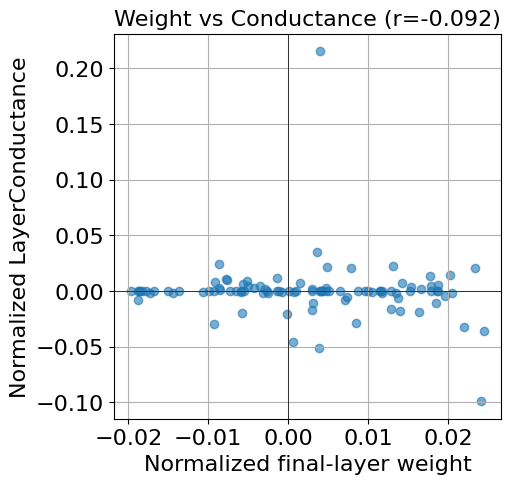

Top neurons by abs attribution: [29 84 92  2 74 73 83 66 47 20]
Top neurons by abs weight: [74 84 17 83 23 54 64 68 38 90]
Overlap count: 3


In [20]:
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# recompute (safe if variables defined already)
lc = lc_attr_test.mean(0).detach().numpy()
lc_norm = lc / np.linalg.norm(lc, ord=1)
w = lin4_weights[0].detach().numpy()
w_norm = w / np.linalg.norm(w, ord=1)

r, p = pearsonr(w_norm, lc_norm)
print(f'Pearson r = {r:.3f}, p = {p:.3e}')

plt.figure(figsize=(5,5))
plt.scatter(w_norm, lc_norm, alpha=0.6)
plt.xlabel('Normalized final-layer weight')
plt.ylabel('Normalized LayerConductance')
plt.title(f'Weight vs Conductance (r={r:.3f})')
plt.axhline(0, color='k', linewidth=0.5); plt.axvline(0, color='k', linewidth=0.5)
plt.grid(True)
plt.show()

top_attr = np.argsort(-np.abs(lc_norm))[:10]
top_w = np.argsort(-np.abs(w_norm))[:10]
print('Top neurons by abs attribution:', top_attr)
print('Top neurons by abs weight:', top_w)
print('Overlap count:', len(set(top_attr) & set(top_w)))